# Implementing basic ML Algorithms from scratch


----


### Neural Network and MNIST dataset

#### Objectives:

- Adapt the Neural Network class created from scratch in previous works to predict numbers from the MNIST dataset.

    * First, predict zeros and ones with a single sigmoid output.
    * Second, predict numbers from 0 to 9 using a softmax layer.


### Context:

This notebook documents my first steps in Machine Learning, guided by my mentor Artem Yankov and the Machine Learning course by Andrew Ng on Coursera. 




-----


### Libraries

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import NNscratch as NN  # Custom library implementing a 3-layer neural network from scratch

# Part 4: Neural Networks applyed to MNIST Dataset

### 4.1 - Predict zeros and ones with a single sigmoid output

#### Model:


   <center> <img  src="./images/C2_W1_Assign1.PNG" width="400" />   <center/>  


#### Import and visualize data:

In [167]:
X, y = NN.load_data()

In [169]:
print('The shape of X is: ', X.shape)
print('The shape of y is: ', y.shape)
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The shape of X is:  (1000, 400)
The shape of y is:  (1000, 1)
The first element of y is:  0
The last element of y is:  1


#### Training Set: plot the part of the input images with labels:

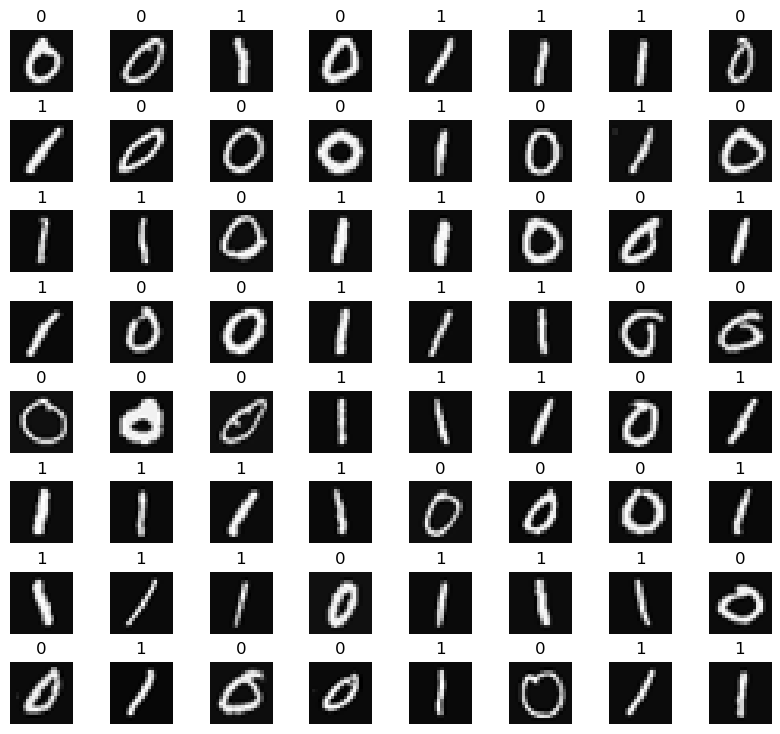

In [177]:
NN.plot_inputs(X,y)

#### Define the Model:

In [180]:
# Model architecture:
# input layer: 400 features
# 1st hidden layer: 25 units, sigmoid activation
# 2nd hidden layer: 15 units, sigmoid activation
# output layer: 1 unit, sigmoid activation
# 

NN_3L = NN.Neural_Network_3L_LogR(400,25,15,1)

#### Train the Model:

In [183]:
j_hist, param_hist = NN_3L.train_gradientDescent(X,y,3,2000)

Epoch 0: Cost = 0.6931652457941261
Epoch 200: Cost = 0.008429205544541143
Epoch 400: Cost = 0.0023690699609680422
Epoch 600: Cost = 0.0013051134020128986
Epoch 800: Cost = 0.0008913887216337728
Epoch 1000: Cost = 0.0006729003894611531
Epoch 1200: Cost = 0.0005386224533049693
Epoch 1400: Cost = 0.00044806571691418664
Epoch 1600: Cost = 0.0003830208180327654
Epoch 1800: Cost = 0.00033411853699599823


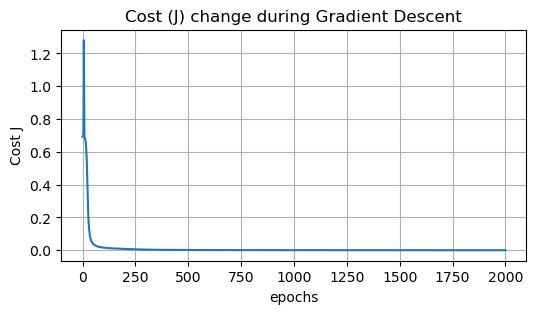

In [184]:
NN.plotJhist(j_hist)

#### Run the predictions:

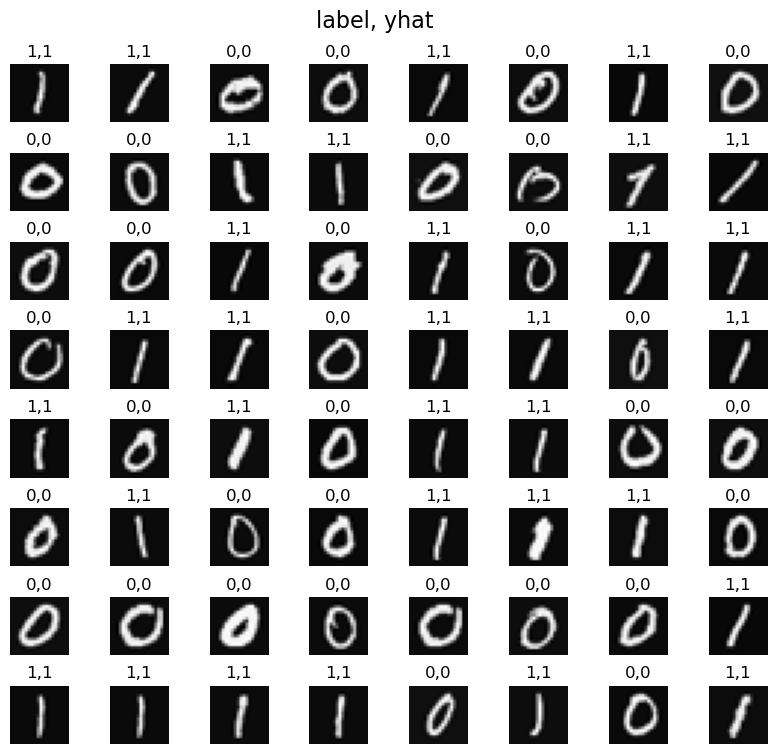

In [196]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = NN_3L.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("label, yhat", fontsize=16)
plt.show()

------

### 4.2 - Predict numbers from 0 to 9 using a softmax layer.